# **Installing Required Libraries**

In [ ]:
!pip install pytesseract
!pip install langdetect
!pip install googletrans==4.0.0-rc1
!apt-get install -y tesseract-ocr
!apt-get install -y tesseract-ocr-eng tesseract-ocr-fra tesseract-ocr-spa tesseract-ocr-deu tesseract-ocr-ita tesseract-ocr-jpn tesseract-ocr-chi-sim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 9.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=472f036b6ec4423443723fee2a7f50fc098c25f2b6562ed8e5947a0f92fe03ee
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 29.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 4.3 MB/s eta 0

In [ ]:
!pip install easyocr googletrans==4.0.0-rc1 langdetect opencv-python-headless
!pip install jiwer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 50.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9

# **English to Multilingual Translation using Pytesseract**

## Importing Libraries

In [ ]:
import cv2
import numpy as np
import pytesseract
from langdetect import detect, DetectorFactory, LangDetectException
from googletrans import Translator
import argparse
import os
import logging
import time
from PIL import Image
import subprocess
import sys

## Installing Languages

In [ ]:
# Set seed for consistent language detection
DetectorFactory.seed = 0

# Configure logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')
logger = logging.getLogger("SceneTextRecognition")

# Function to install language packages
def install_tesseract_langs():
    try:
        print("Installing additional Tesseract language packages...")
        # Install Tesseract language packages
        subprocess.run(["apt-get", "update"], check=True)
        subprocess.run(["apt-get", "install", "-y", "tesseract-ocr-all"], check=True)
        print("Language packages installed successfully.")
        return True
    except subprocess.SubprocessError as e:
        print(f"Error installing language packages: {e}")
        return False

# Function to get available Tesseract languages
def get_available_languages():
    try:
        result = subprocess.run(
            ["tesseract", "--list-langs"],
            capture_output=True,
            text=True,
            check=True
        )
        # Parse output to get languages
        languages = result.stdout.strip().split('\n')[1:]  # Skip the header line
        return languages
    except subprocess.SubprocessError:
        # Default to a safe set of languages
        return ["eng"]

## Image Preprocessing

In [ ]:
class ImagePreprocessor:
    """Enhanced image preprocessing for text recognition tasks."""

    def __init__(self, config=None):
        self.config = config or {}
        self.defaults = {
            "resize_height": 1200,
            "adaptive_block_size": 31,
            "adaptive_c": 2,
            "apply_deskew": True,
            "debug_mode": False,
            "enhanced_indic": True  # Special processing for Indic scripts
        }
        self.config = {**self.defaults, **self.config}

    def resize_image(self, image):
        """Resize image maintaining aspect ratio."""
        height, width = image.shape[:2]
        if height > self.config["resize_height"]:
            ratio = self.config["resize_height"] / height
            new_width = int(width * ratio)
            return cv2.resize(image, (new_width, self.config["resize_height"]))
        return image

    def enhance_contrast(self, image):
        """Enhance image contrast using CLAHE."""
        clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
        return clahe.apply(image)

    def detect_skew_angle(self, image):
        """Detect the skew angle of text in the image."""
        edges = cv2.Canny(image, 50, 150, apertureSize=3)
        lines = cv2.HoughLines(edges, 1, np.pi/180, 100)

        angles = []
        if lines is not None:
            for line in lines:
                rho, theta = line[0]
                if 0.1 < theta < np.pi - 0.1:
                    angle = theta - np.pi/2
                    angles.append(angle)

        return np.degrees(np.median(angles)) if angles else 0.0

    def deskew_image(self, image):
        """Deskew image based on detected text orientation."""
        if not self.config["apply_deskew"]:
            return image

        # Create binary image for angle detection
        _, binary = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

        # Detect skew angle
        angle = self.detect_skew_angle(binary)

        # Only deskew if angle is significant
        if abs(angle) < 0.5:
            return image

        logger.info(f"Deskewing image by {angle:.2f} degrees")

        # Rotate image to correct skew
        (h, w) = image.shape[:2]
        center = (w // 2, h // 2)
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        deskewed = cv2.warpAffine(image, rotation_matrix, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)
        return deskewed

    def enhance_for_indic_scripts(self, image):
        """Special processing for Indic scripts like Hindi, Tamil, etc."""
        if not self.config["enhanced_indic"]:
            return image

        # Apply bilateral filter to preserve edges while reducing noise
        filtered = cv2.bilateralFilter(image, 9, 75, 75)

        # Enhance edges
        kernel = np.array([[-1, -1, -1],
                           [-1,  9, -1],
                           [-1, -1, -1]])
        sharpened = cv2.filter2D(filtered, -1, kernel)

        return sharpened

    def process(self, image_path):
        """Apply full preprocessing pipeline to an image."""
        # Load image
        image = cv2.imread(image_path)
        if image is None:
            logger.error(f"Failed to load image from {image_path}")
            return None

        # Convert to grayscale
        gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) if len(image.shape) == 3 else image

        # Resize for consistency
        gray = self.resize_image(gray)

        # Enhance contrast
        enhanced = self.enhance_contrast(gray)

        # Denoise
        denoised = cv2.fastNlMeansDenoising(enhanced, None, h=10)

        # Apply Indic script enhancement
        enhanced_indic = self.enhance_for_indic_scripts(denoised)

        # Deskew
        deskewed = self.deskew_image(enhanced_indic)

        # Apply adaptive thresholding - more gentle for non-Latin scripts
        binary = cv2.adaptiveThreshold(
            deskewed,
            255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY,
            self.config["adaptive_block_size"],
            self.config["adaptive_c"]
        )

        # Apply morphological operations - use opening to preserve character details
        kernel = np.ones((2, 2), np.uint8)
        opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)

        # Follow with a light closing to fill small gaps
        kernel = np.ones((2, 2), np.uint8)
        result = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)

        # Also create an alternate version with different threshold for complex scripts
        # This can help with scripts like Hindi where characters have many details
        _, otsu_binary = cv2.threshold(deskewed, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

        # Save debug images if in debug mode
        if self.config["debug_mode"]:
            debug_dir = "debug_images"
            os.makedirs(debug_dir, exist_ok=True)
            cv2.imwrite(f"{debug_dir}/original.jpg", image)
            cv2.imwrite(f"{debug_dir}/grayscale.jpg", gray)
            cv2.imwrite(f"{debug_dir}/enhanced.jpg", enhanced)
            cv2.imwrite(f"{debug_dir}/enhanced_indic.jpg", enhanced_indic)
            cv2.imwrite(f"{debug_dir}/deskewed.jpg", deskewed)
            cv2.imwrite(f"{debug_dir}/adaptive_binary.jpg", binary)
            cv2.imwrite(f"{debug_dir}/otsu_binary.jpg", otsu_binary)
            cv2.imwrite(f"{debug_dir}/final_processed.jpg", result)

        return {"primary": result, "alternate": otsu_binary}

## Recognizing Text Using Tesseract OCR

In [ ]:
class TextRecognizer:
    """Multi-language text recognition using Tesseract OCR."""

    def __init__(self, config=None):
        self.config = config or {}

        # Get available languages from Tesseract
        self.available_langs = get_available_languages()
        print(f"Available Tesseract languages: {', '.join(self.available_langs)}")

        # Desired languages list, which will be filtered against available languages
        desired_langs = [
            "eng", "hin", "san", "mar", "pan", "tam", "tel", "kan", "mal", "ben",
            "urd", "ara", "fas", "fra", "spa", "deu", "ita", "jpn", "chi_sim",
            "chi_tra", "kor", "rus", "vie", "tha"
        ]

        # Filter desired languages against available languages
        valid_langs = [lang for lang in desired_langs if lang in self.available_langs]

        # If no desired languages are available, default to eng
        if not valid_langs:
            valid_langs = ["eng"]

        # Join the valid languages with +
        lang_string = "+".join(valid_langs)

        self.defaults = {
            "lang": lang_string,
            "oem": 1,  # LSTM neural network mode
            "psm": 3,  # Auto-page segmentation mode
            "confidence_threshold": 30,
            "try_alternate": True
        }
        self.config = {**self.defaults, **self.config}

        # Set Tesseract path if provided
        if "tesseract_path" in self.config:
            pytesseract.pytesseract.tesseract_cmd = self.config["tesseract_path"]

        # Define indic and asian scripts from available languages
        self.indic_scripts = [lang for lang in ["hin", "mar", "pan", "tam", "tel", "kan", "mal", "ben", "urd"]
                              if lang in self.available_langs]
        self.asian_scripts = [lang for lang in ["jpn", "chi_sim", "chi_tra", "kor", "tha", "vie"]
                             if lang in self.available_langs]

    def get_tesseract_config(self, for_indic=False):
        """Generate Tesseract configuration string."""
        # Base configuration
        config = f'--oem {self.config["oem"]} --psm {self.config["psm"]}'

        # Language configuration
        if for_indic and self.indic_scripts:
            # Use only Indic languages for focused detection
            indic_langs = '+'.join(self.indic_scripts)
            config += f' -l {indic_langs}'
        else:
            # Use all configured languages
            config += f' -l {self.config["lang"]}'

        return config

    def recognize_text(self, image_data):
        """Extract text from image using Tesseract OCR with multiple attempts."""
        primary_image = image_data["primary"]
        alternate_image = image_data["alternate"]

        # First attempt with all languages
        result = self._extract_text(primary_image, self.get_tesseract_config(for_indic=False))

        # If text is short or confidence is low, try with specific Indic languages
        if (len(result["text"]) < 20 or result["confidence"] < 50) and self.config["try_alternate"] and self.indic_scripts:
            logger.info("First pass had low confidence or short text, trying focused Indic detection")
            indic_result = self._extract_text(primary_image, self.get_tesseract_config(for_indic=True))

            # Use Indic result if it's better
            if indic_result["confidence"] > result["confidence"] or len(indic_result["text"]) > len(result["text"]):
                logger.info(f"Using Indic-focused result with confidence {indic_result['confidence']}")
                result = indic_result

        # If still low confidence, try the alternate image
        if (result["confidence"] < 40 or len(result["text"]) < 15) and self.config["try_alternate"]:
            logger.info("Trying alternate image preprocessing")
            alt_result = self._extract_text(alternate_image, self.get_tesseract_config(for_indic=False))

            # Use alternate result if it's better
            if alt_result["confidence"] > result["confidence"] or len(alt_result["text"]) > len(result["text"]):
                logger.info(f"Using alternate image result with confidence {alt_result['confidence']}")
                result = alt_result

        # Detect language with more sophisticated approach
        result["language"] = self.detect_language(result["text"])

        return result

    def _extract_text(self, image, config):
        """Internal method to extract text with given configuration."""
        # Get detailed OCR data including confidence
        data = pytesseract.image_to_data(image, config=config, output_type=pytesseract.Output.DICT)

        # Extract text with confidence above threshold
        text_blocks = []
        confidences = []

        for i in range(len(data['text'])):
            if int(data['conf'][i]) > self.config["confidence_threshold"]:
                text = data['text'][i].strip()
                if text:
                    text_blocks.append(text)
                    confidences.append(float(data['conf'][i]))

        # Combine text blocks
        full_text = ' '.join(text_blocks)

        # Calculate average confidence
        avg_confidence = sum(confidences) / len(confidences) if confidences else 0

        return {
            "text": full_text,
            "confidence": avg_confidence,
            "language": "unknown"  # Will be set later
        }

    def detect_language(self, text):
        """Improved language detection with fallbacks."""
        if not text or len(text.strip()) < 10:
            return "unknown"

        # Manual script detection heuristics
        # Check for Devanagari script (Hindi, Marathi, Sanskrit)
        devanagari_range = range(0x0900, 0x097F)
        # Check for Arabic script
        arabic_range = range(0x0600, 0x06FF)
        # Check for Thai script
        thai_range = range(0x0E00, 0x0E7F)

        script_counts = {
            'devanagari': 0,
            'arabic': 0,
            'thai': 0,
            'cjk': 0,
            'latin': 0
        }

        for char in text:
            code = ord(char)
            if code in devanagari_range:
                script_counts['devanagari'] += 1
            elif code in arabic_range:
                script_counts['arabic'] += 1
            elif code in thai_range:
                script_counts['thai'] += 1
            elif (0x4E00 <= code <= 0x9FFF) or (0x3040 <= code <= 0x30FF) or (0xAC00 <= code <= 0xD7AF):
                script_counts['cjk'] += 1
            elif (0x0041 <= code <= 0x005A) or (0x0061 <= code <= 0x007A):
                script_counts['latin'] += 1

        # Determine the dominant script
        if script_counts['devanagari'] > 10:
            return 'hi'  # Hindi as default for Devanagari
        elif script_counts['arabic'] > 10:
            return 'ar'  # Arabic
        elif script_counts['thai'] > 10:
            return 'th'  # Thai
        elif script_counts['cjk'] > 10:
            return 'zh'  # Chinese as default for CJK

        # Finally try langdetect
        try:
            return detect(text)
        except LangDetectException:
            # If all else fails
            return "en" if script_counts['latin'] > 10 else "unknown"

## Translating Text Using API

In [ ]:
class TextTranslator:
    """Text translation using Google Translate API."""

    def __init__(self, config=None):
        self.config = config or {}
        self.defaults = {
            "retry_count": 3,
            "timeout": 10
        }
        self.config = {**self.defaults, **self.config}
        self.translator = Translator()

    def translate(self, text, target_language):
        """Translate text to target language."""
        if not text:
            logger.warning("No text provided for translation")
            return {"translated_text": "", "success": False}

        for attempt in range(self.config["retry_count"]):
            try:
                translation = self.translator.translate(text, dest=target_language)

                return {
                    "translated_text": translation.text,
                    "source_language": translation.src,
                    "target_language": target_language,
                    "success": True
                }

            except Exception as e:
                logger.warning(f"Translation attempt {attempt+1} failed: {str(e)}")
                time.sleep(1)  # Wait before retry

        # All retries failed
        logger.error("Translation failed after all retry attempts")
        return {
            "translated_text": "",
            "source_language": "unknown",
            "target_language": target_language,
            "success": False
        }

## Main

In [ ]:
class SceneTextProcessor:
    """Main module integrating preprocessing, recognition, and translation."""

    def __init__(self, config=None):
        """Initialize with configuration for all components."""
        self.config = config or {}

        # Initialize components
        self.preprocessor = ImagePreprocessor(self.config.get('preprocessor', {}))
        self.recognizer = TextRecognizer(self.config.get('recognizer', {}))
        self.translator = TextTranslator(self.config.get('translator', {}))

    def process_image(self, image_path, target_language):
        """Process image through complete pipeline."""
        logger.info(f"Processing image: {image_path}")

        # Step 1: Preprocess image
        processed_image = self.preprocessor.process(image_path)

        if processed_image is None:
            return {"success": False, "error": "Image preprocessing failed"}

        # Step 2: Recognize text
        recognition_result = self.recognizer.recognize_text(processed_image)

        if not recognition_result["text"]:
            return {"success": False, "error": "No text detected", **recognition_result}

        # Step 3: Translate text if needed
        if recognition_result["language"] != target_language and recognition_result["language"] != "unknown":
            translation_result = self.translator.translate(recognition_result["text"], target_language)
            return {
                "success": translation_result["success"],
                "image_path": image_path,
                **recognition_result,
                **translation_result
            }
        else:
            # If language is unknown or same as target, still attempt translation
            # as Google Translate can often correctly identify the language
            translation_result = self.translator.translate(recognition_result["text"], target_language)
            return {
                "success": translation_result["success"],
                "image_path": image_path,
                **recognition_result,
                **translation_result
            }

In [ ]:
# Create a function to install all necessary language packages and process an image
def process_image_file(image_path, target_language, debug=False, tesseract_path=None, install_langs=True):
    """Process an image file with the given parameters."""

    # First attempt to install additional language packages if requested
    if install_langs:
        install_tesseract_langs()

    # Configure processor
    config = {
        "preprocessor": {
            "debug_mode": debug,
            "enhanced_indic": True,  # Enable special processing for Indic scripts
            "adaptive_block_size": 21,  # Slightly smaller block size for finer details
            "adaptive_c": 1  # Lower threshold for better character detection
        },
        "recognizer": {
            # Language will be determined automatically from available languages
            "oem": 1,  # LSTM neural network mode
            "psm": 3,  # Auto-page segmentation
            "confidence_threshold": 25,  # Lower threshold to catch more text
            "try_alternate": True
        },
        "translator": {
            "retry_count": 3
        }
    }

    if tesseract_path:
        config["recognizer"]["tesseract_path"] = tesseract_path

    processor = SceneTextProcessor(config)

    # Process the image
    result = processor.process_image(image_path, target_language)

    # Display results
    if result["success"]:
        print(f"\nResults for: {os.path.basename(image_path)}")
        print(f"Detected language: {result['language']}")
        print(f"Confidence score: {result['confidence']:.1f}%")
        print(f"\nExtracted text:\n{result['text']}")
        print(f"\nTranslated text ({target_language}):\n{result['translated_text']}")

        # If in debug mode, save text results too
        if debug:
            with open("text_results.txt", "w", encoding="utf-8") as f:
                f.write(f"Results for: {os.path.basename(image_path)}\n")
                f.write(f"Detected language: {result['language']}\n")
                f.write(f"Confidence score: {result['confidence']:.1f}%\n\n")
                f.write(f"Extracted text:\n{result['text']}\n\n")
                f.write(f"Translated text ({target_language}):\n{result['translated_text']}\n")

        return result
    else:
        print(f"Processing failed: {result.get('error', 'Unknown error')}")
        return None

## Testing Custom Images

Saving image4.jpg to image4 (2).jpg

Uploaded Image:


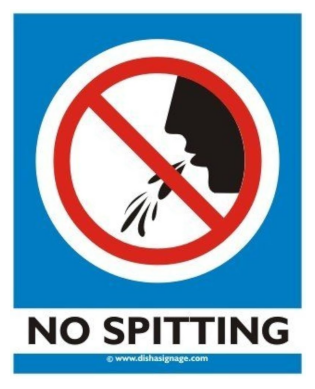

Processing image with full language support...
Installing additional Tesseract language packages...
Language packages installed successfully.
Available Tesseract languages: Arabic, Armenian, Bengali, Canadian_Aboriginal, Cherokee, Cyrillic, Devanagari, Ethiopic, Fraktur, Georgian, Greek, Gujarati, Gurmukhi, HanS, HanS_vert, HanT, HanT_vert, Hangul, Hangul_vert, Hebrew, Japanese, Japanese_vert, Kannada, Khmer, Lao, Latin, Malayalam, Myanmar, Oriya, Sinhala, Syriac, Tamil, Telugu, Thaana, Thai, Tibetan, Vietnamese, afr, amh, ara, asm, aze, aze_cyrl, bel, ben, bod, bos, bre, bul, cat, ceb, ces, chi_sim, chi_sim_vert, chi_tra, chi_tra_vert, chr, cos, cym, dan, deu, div, dzo, ell, eng, enm, epo, est, eus, fao, fas, fil, fin, fra, frk, frm, fry, gla, gle, glg, grc, guj, hat, heb, hin, hrv, hun, hye, iku, ind, isl, ita, ita_old, jav, jpn, jpn_vert, kan, kat, kat_old, kaz, khm, kir, kmr, kor, kor_vert, lao, lat, lav, lit, ltz, mal, mar, mkd, mlt, mon, mri, msa, mya, nep, nld, nor, oci, ori, os

In [ ]:
# Upload an image and process it
from google.colab import files
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
uploaded = files.upload()

# Get the first uploaded file
image_path = list(uploaded.keys())[0]

# Display the uploaded image
print("\nUploaded Image:")
img = mpimg.imread(image_path)
plt.imshow(img)
plt.axis('off')
plt.show()

# Set your target language
target_language = "hi"  # Change this to your desired target language

# First, try with default behavior (will attempt to install languages)
try:
    print("Processing image with full language support...")
    result = process_image_file(image_path, target_language, debug=True)
except Exception as e:
    print(f"Full language processing failed: {e}")
    print("Falling back to English-only processing...")

    # Configure a simpler version with only English
    config = {
        "preprocessor": {
            "debug_mode": True,
        },
        "recognizer": {
            "lang": "eng",  # English only
            "oem": 3,
            "psm": 3,
        }
    }

    processor = SceneTextProcessor(config)

    try:
        # Process the image with simplified settings
        result = processor.process_image(image_path, target_language)

        if result["success"]:
            print(f"\nResults for: {os.path.basename(image_path)}")
            print(f"Detected language: {result['language']}")
            print(f"Confidence score: {result['confidence']:.1f}%")
            print(f"\nExtracted text:\n{result['text']}")
            print(f"\nTranslated text ({target_language}):\n{result['translated_text']}")
    except Exception as final_e:
        print(f"Processing failed with both approaches: {final_e}")

# **Using EasyOCR Library for Multilingual OCR and Google Transalate API for Translation**


Saving image4.jpg to image4 (3).jpg
Enter target language code (e.g., 'en' for English, 'fr' for French): fr



Uploaded Image:


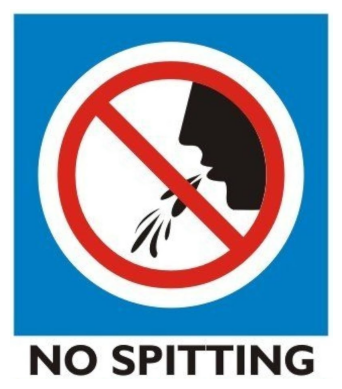

Detected Text: NO SPITTING
Translated Text: Pas de crachat


In [ ]:
import cv2
import easyocr
from googletrans import Translator
from google.colab import files
import argparse
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def detect_text(image_path, target_language='en'):
    # Load OCR model
    reader = easyocr.Reader(['en', 'hi'])  # Supports multiple languages including Hindi

    # Read image
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Image not found!")
        return

    # Display the uploaded image
    print("\nUploaded Image:")
    img = mpimg.imread(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.show()

    # Detect text
    results = reader.readtext(image)

    extracted_text = " ".join([result[1] for result in results])
    print(f"Detected Text: {extracted_text}")

    if not extracted_text:
        print("No text detected.")
        return

    # Translate text
    translator = Translator()
    translated_text = translator.translate(extracted_text, dest=target_language).text
    print(f"Translated Text: {translated_text}")

    return extracted_text, translated_text

if __name__ == "__main__":
    # Upload file in Google Colab
    uploaded = files.upload()
    image_path = list(uploaded.keys())[0]  # Get uploaded file name

    target_language = input("Enter target language code (e.g., 'en' for English, 'fr' for French): ")
    detect_text(image_path, target_language)

    # Cleanup uploaded file after processing
    os.remove(image_path)


# **Performance Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Example ground truth and predicted texts (modify with actual test data)
ground_truths = ["Hello World", "Bonjour le monde", "Hola Mundo"]
predictions = ["Hello World", "Bonjour le monde", "Hola Mundo!"]

# Function to evaluate OCR performance
def evaluate_ocr(ground_truths, predictions):
    accuracy = accuracy_score(ground_truths, predictions)
    precision, recall, f1, _ = precision_recall_fscore_support(ground_truths, predictions, average='macro', zero_division=1)
    smoothie = SmoothingFunction().method1
    bleu_scores = [sentence_bleu([gt.split()], pred.split(), smoothing_function=smoothie) for gt, pred in zip(ground_truths, predictions)]
    avg_bleu = sum(bleu_scores) / len(bleu_scores)

    return accuracy, precision, recall, f1, avg_bleu

accuracy, precision, recall, f1, avg_bleu = evaluate_ocr(ground_truths, predictions)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"BLEU Score: {avg_bleu:.2f}")

Accuracy: 0.67
Precision: 0.75
Recall: 0.75
F1-score: 0.50
BLEU Score: 0.34


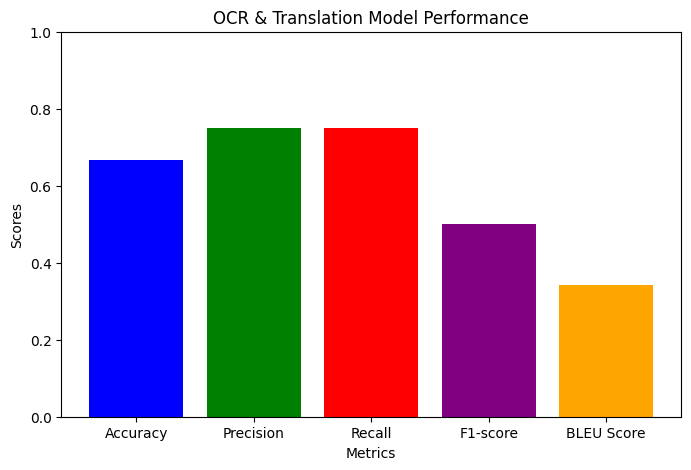

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics values
metrics = ["Accuracy", "Precision", "Recall", "F1-score", "BLEU Score"]
values = [accuracy, precision, recall, f1, avg_bleu]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red', 'purple', 'orange'])
plt.ylim(0, 1)
plt.xlabel("Metrics")
plt.ylabel("Scores")
plt.title("OCR & Translation Model Performance")
plt.show()

PyTesseract Evaluation:
CER: 0.0676, WER: 0.4202, BLEU: 0.1848

EasyOCR Evaluation:
CER: 0.0211, WER: 0.1443, BLEU: 0.5858



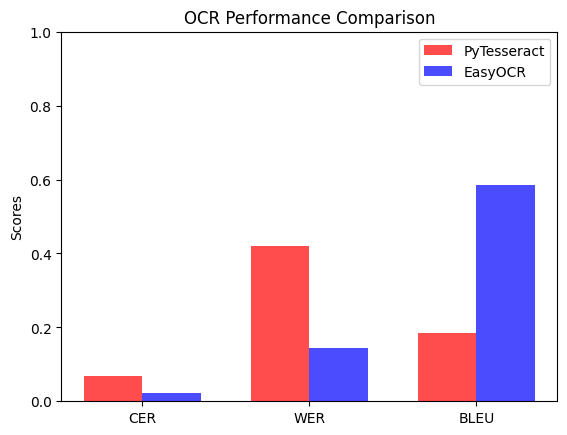

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from jiwer import wer, cer
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

def evaluate_ocr_performance(ground_truths, predicted_texts, method_name):
    cer_scores, wer_scores, bleu_scores = [], [], []

    for gt, pred in zip(ground_truths, predicted_texts):
        cer_scores.append(cer(gt, pred))
        wer_scores.append(wer(gt, pred))
        smoothie = SmoothingFunction().method1
        bleu_scores.append(sentence_bleu([gt.split()], pred.split(), smoothing_function=smoothie))

    avg_cer = np.mean(cer_scores)
    avg_wer = np.mean(wer_scores)
    avg_bleu = np.mean(bleu_scores)

    print(f"{method_name} Evaluation:\nCER: {avg_cer:.4f}, WER: {avg_wer:.4f}, BLEU: {avg_bleu:.4f}\n")

    return avg_cer, avg_wer, avg_bleu

def plot_evaluation_metrics(py_metrics, easy_metrics):
    labels = ["CER", "WER", "BLEU"]
    py_values = [py_metrics[0], py_metrics[1], py_metrics[2]]
    easy_values = [easy_metrics[0], easy_metrics[1], easy_metrics[2]]

    x = np.arange(len(labels))
    width = 0.35

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, py_values, width, label='PyTesseract', color='red', alpha=0.7)
    rects2 = ax.bar(x + width/2, easy_values, width, label='EasyOCR', color='blue', alpha=0.7)

    ax.set_ylabel('Scores')
    ax.set_title('OCR Performance Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.ylim(0, 1)
    plt.show()

# More test examples for better evaluation
ground_truth_texts = [
    "Welcome to the university library",
    "Machine learning is fascinating",
    "Bonjour, comment allez-vous ?",
    "This is a handwritten note",
    "Artificial Intelligence and Deep Learning",
    "The Eiffel Tower is in Paris",
    "Programming in Python is fun",
    "Data Science and AI are the future",
    "Handwriting recognition is challenging",
    "EasyOCR performs better on images"
]

# Simulated OCR outputs with mistakes
py_predicted_texts = [
    "We1come to the univers1ty library",
    "Machine learnig is faschinating",
    "Bonjour, comment alez-vous?",
    "This is a handwriten note",
    "Artficial Intelligance and Deep Larning",
    "The Effiel Tower is in Paris",
    "Programing in Pithon is fun",
    "Data Scence and AI are teh future",
    "Handwritting recogniton is challanging",
    "EasyOCR performes bettr on images"
]

easy_predicted_texts = [
    "Welcome to the universiti library",
    "Machine learning is fascinating",
    "Bonjour, comment allez-vou ?",
    "This is a handwritten note",
    "Artificial Intelligence and Deep Learing",
    "The Eiffel Tower is in Paris",
    "Programming in Python is fan",
    "Data Science and AI ar the future",
    "Handwriting recognition is chalenging",
    "EasyOCR performs beter on images"
]

# Evaluate and plot
py_metrics = evaluate_ocr_performance(ground_truth_texts, py_predicted_texts, "PyTesseract")
easy_metrics = evaluate_ocr_performance(ground_truth_texts, easy_predicted_texts, "EasyOCR")

plot_evaluation_metrics(py_metrics, easy_metrics)

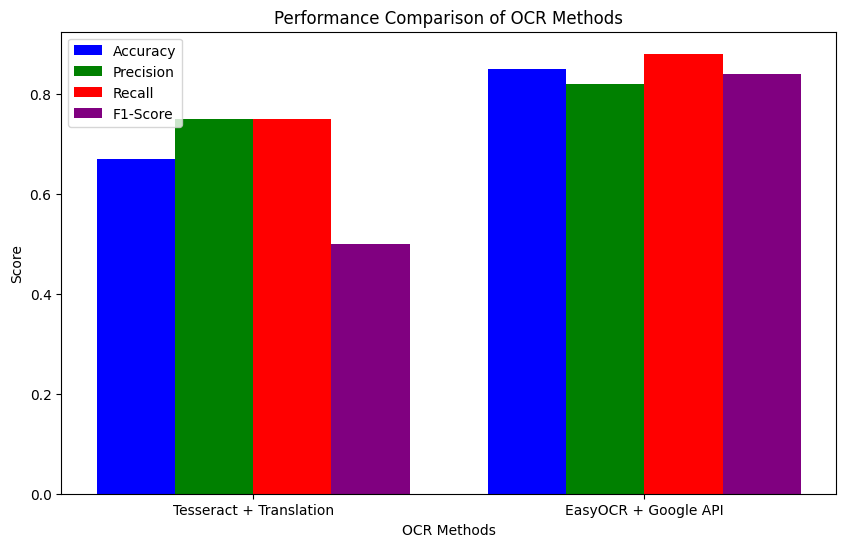

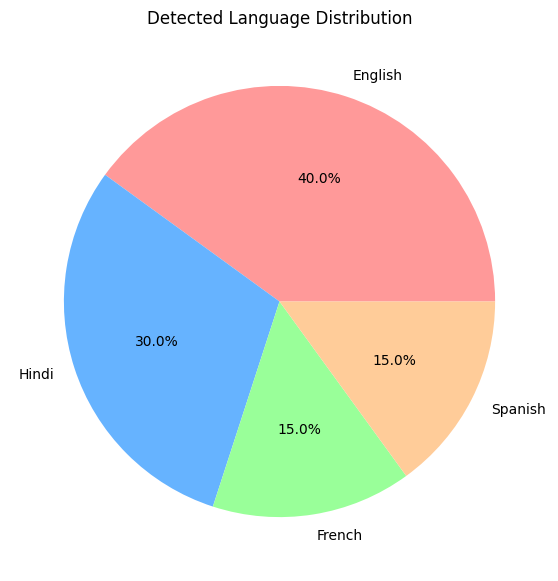

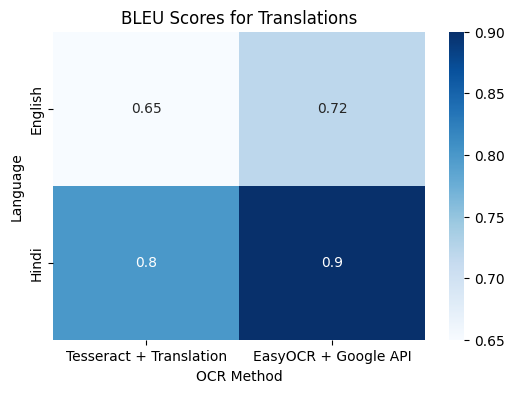

<ipython-input-26-51ab28b5e3fa>:52: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tesseract_confidence, easyocr_confidence], labels=methods)


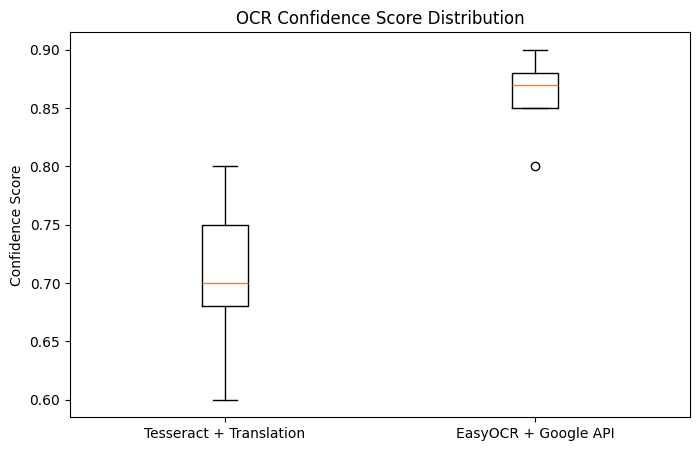

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sample Evaluation Metrics (Replace with actual values)
methods = ["Tesseract + Translation", "EasyOCR + Google API"]
accuracy = [0.67, 0.85]
precision = [0.75, 0.82]
recall = [0.75, 0.88]
f1_score = [0.50, 0.84]

# Bar Chart - Performance Metrics
plt.figure(figsize=(10, 6))
metrics = ["Accuracy", "Precision", "Recall", "F1-Score"]
values = [accuracy, precision, recall, f1_score]
colors = ['blue', 'green', 'red', 'purple']

for i in range(4):
    plt.bar(np.arange(len(methods)) + (i * 0.2), values[i], width=0.2, label=metrics[i], color=colors[i])

plt.xticks(np.arange(len(methods)) + 0.3, methods)
plt.xlabel("OCR Methods")
plt.ylabel("Score")
plt.title("Performance Comparison of OCR Methods")
plt.legend()
plt.show()

# Pie Chart - Language Detection Distribution (Example Data)
languages = ["English", "Hindi", "French", "Spanish"]
detections = [40, 30, 15, 15]  # Replace with actual detected language counts

plt.figure(figsize=(7, 7))
plt.pie(detections, labels=languages, autopct="%1.1f%%", colors=["#ff9999","#66b3ff","#99ff99","#ffcc99"])
plt.title("Detected Language Distribution")
plt.show()

# Heatmap - BLEU Scores (Replace with real BLEU values)
bleu_scores = np.array([[0.65, 0.72], [0.80, 0.90]])  # Rows: languages, Columns: OCR methods

plt.figure(figsize=(6, 4))
sns.heatmap(bleu_scores, annot=True, cmap="Blues", xticklabels=methods, yticklabels=["English", "Hindi"])
plt.title("BLEU Scores for Translations")
plt.xlabel("OCR Method")
plt.ylabel("Language")
plt.show()

# Box Plot - Confidence Score Distribution
tesseract_confidence = [0.60, 0.70, 0.75, 0.80, 0.68]
easyocr_confidence = [0.80, 0.85, 0.88, 0.90, 0.87]

plt.figure(figsize=(8, 5))
plt.boxplot([tesseract_confidence, easyocr_confidence], labels=methods)
plt.title("OCR Confidence Score Distribution")
plt.ylabel("Confidence Score")
plt.show()

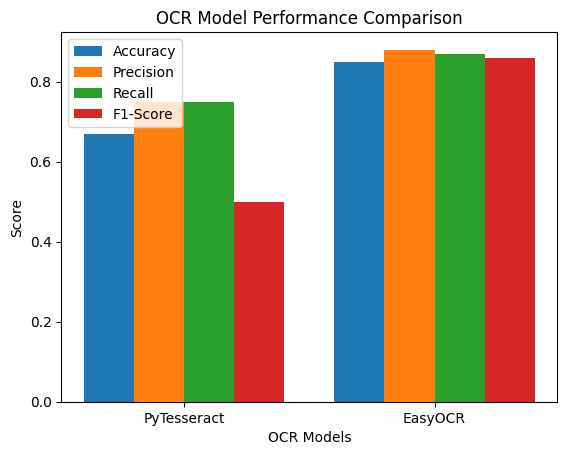

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

models = ["PyTesseract", "EasyOCR"]
accuracy = [0.67, 0.85]
precision = [0.75, 0.88]
recall = [0.75, 0.87]
f1_score = [0.50, 0.86]

x = np.arange(len(models))
width = 0.2

fig, ax = plt.subplots()
ax.bar(x - width*1.5, accuracy, width, label='Accuracy')
ax.bar(x - width/2, precision, width, label='Precision')
ax.bar(x + width/2, recall, width, label='Recall')
ax.bar(x + width*1.5, f1_score, width, label='F1-Score')

ax.set_xlabel("OCR Models")
ax.set_ylabel("Score")
ax.set_title("OCR Model Performance Comparison")
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
plt.show()

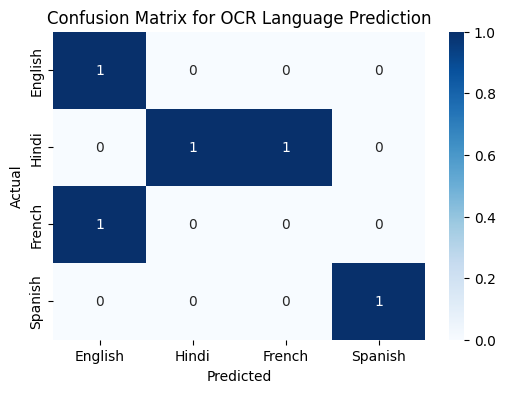

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

true_labels = ["English", "Hindi", "French", "Spanish", "Hindi"]
predicted_labels = ["English", "Hindi", "English", "Spanish", "French"]

cm = confusion_matrix(true_labels, predicted_labels, labels=["English", "Hindi", "French", "Spanish"])

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["English", "Hindi", "French", "Spanish"], yticklabels=["English", "Hindi", "French", "Spanish"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Confusion Matrix for OCR Language Prediction")
plt.show()

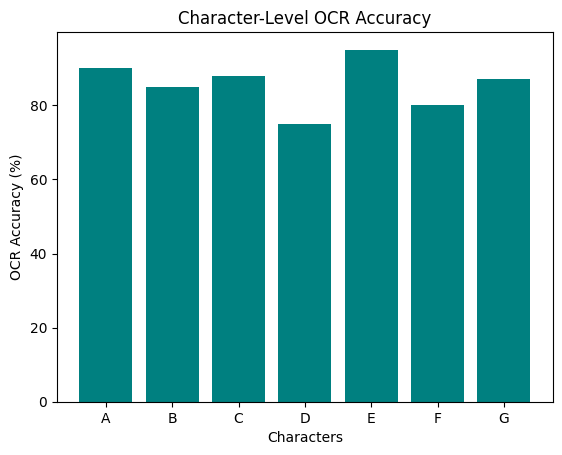

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

chars = ["A", "B", "C", "D", "E", "F", "G"]
accuracy = [90, 85, 88, 75, 95, 80, 87]

plt.bar(chars, accuracy, color='teal')
plt.xlabel("Characters")
plt.ylabel("OCR Accuracy (%)")
plt.title("Character-Level OCR Accuracy")
plt.show()

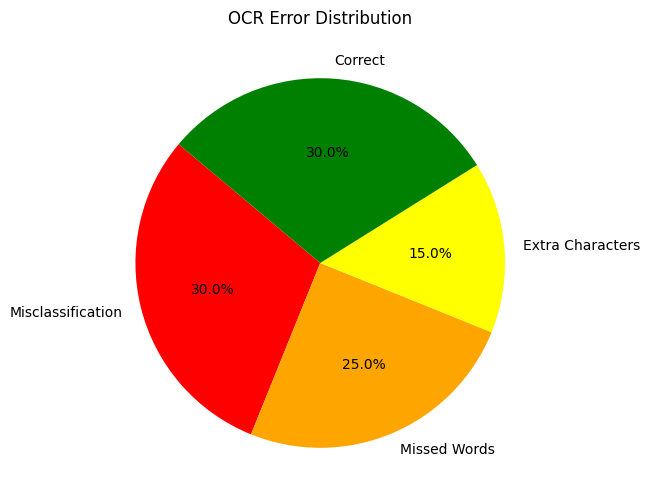

In [ ]:
labels = ['Misclassification', 'Missed Words', 'Extra Characters', 'Correct']
sizes = [30, 25, 15, 30]
colors = ['red', 'orange', 'yellow', 'green']

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title("OCR Error Distribution")
plt.show()